# TF data presentation

Presenting datasets for Andreas' MSc thesis project about truck factor analyses.

# Prerequisites

This notebook uses various external libraries. In this section, we also define all helper functions.

In [1]:
# Import libraries and configure this notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets

In [2]:
codescene_feirra = pd.read_csv('./data/truck_factor__summary__ferreria.csv', sep=',', decimal=".")
codescene_feirra.describe()

,authors,active_authors,entities,commits
count,34.000000,34.000000,34.000000,34.000000
mean,226.647059,19.676471,723.000000,3757.823529
std,355.409783,43.784403,1021.116442,6978.861879
min,0.000000,0.000000,11.000000,0.000000
25%,63.500000,4.250000,230.750000,1091.500000
50%,113.500000,8.000000,467.500000,1613.000000
75%,197.750000,16.750000,623.250000,2736.750000
max,1597.000000,250.000000,5320.000000,38152.000000


In [3]:
codescene_avelino = pd.read_csv('./data/truck_factor__summary__avelino.csv', sep=',', decimal=".")
codescene_avelino.describe()

,authors,active_authors,entities,commits
count,59.000000,59.000000,59.000000,59.000000
mean,192.847458,23.016949,764.966102,3707.372881
std,205.134507,34.498621,1032.731780,5216.604583
min,4.000000,1.000000,67.000000,276.000000
25%,68.000000,7.000000,212.000000,1039.500000
50%,150.000000,13.000000,439.000000,1687.000000
75%,226.000000,28.500000,680.000000,4596.000000
max,1266.000000,239.000000,4621.000000,32017.000000


In [4]:
codescene_open = pd.read_csv('./data/truck_factor__summary__oss.csv', sep=',', decimal=".")
codescene_open_summary = pd.read_csv('./data/TF_CS_OSS.csv', sep=',', decimal=".")
codescene_open = pd.merge(codescene_open, codescene_open_summary, on='project_id', how='inner')
codescene_open.describe()

,project_id,job_id,authors,active_authors,entities,commits,tf
count,736.000000,7.360000e+02,736.000000,736.000000,736.000000,736.000000,736.000000
mean,35794.248641,1.023646e+06,42.211957,4.601902,1020.130435,1300.725543,1.286685
std,4884.710209,2.980459e+05,169.943308,16.368393,4940.523233,6776.716799,1.137194
min,2477.000000,7.711180e+05,0.000000,0.000000,0.000000,0.000000,1.000000
25%,34020.750000,8.241532e+05,2.000000,1.000000,21.750000,25.000000,1.000000
50%,35638.000000,9.006775e+05,2.000000,1.000000,103.000000,39.000000,1.000000
75%,37279.750000,1.038088e+06,12.000000,2.000000,253.750000,228.250000,1.000000
max,46511.000000,1.800383e+06,2246.000000,217.000000,68922.000000,96968.000000,15.000000


In [73]:
codescene_open_files = pd.read_csv('./data/truck_factor__summary__oss.csv', sep=',', decimal=".")
codescene_open_entity_ownership = pd.read_csv('./data/truck_factor__entity_ownership__oss.csv', sep=',', decimal=".")
tfProjects = pd.read_csv('./data/TF_CS_OSS.csv', sep=',', decimal=".")

# Grouping by 'project_id' and getting the count of distinct 'entity'
project_files = codescene_open_entity_ownership.groupby('project_id')['entity'].nunique().reset_index()


# Merge the DataFrames based on 'project_id'
merged_data = pd.merge(codescene_open_files, project_files, on='project_id', how='inner')

# Drop the 'entities' column
merged_data = merged_data.drop(columns=['entities'])

# Rename the 'entity' column to 'entities'
merged_data = merged_data.rename(columns={'entity': 'entities'})

merged_data = pd.merge(merged_data, tfProjects, on='project_id', how='inner')

codescene_open_files = merged_data

codescene_open_files.describe()

,project_id,job_id,authors,active_authors,commits,entities,tf
count,736.000000,7.360000e+02,736.000000,736.000000,736.000000,736.000000,736.000000
mean,35794.248641,1.023646e+06,42.211957,4.601902,1300.725543,513.020380,1.286685
std,4884.710209,2.980459e+05,169.943308,16.368393,6776.716799,2879.846356,1.137194
min,2477.000000,7.711180e+05,0.000000,0.000000,0.000000,1.000000,1.000000
25%,34020.750000,8.241532e+05,2.000000,1.000000,25.000000,13.000000,1.000000
50%,35638.000000,9.006775e+05,2.000000,1.000000,39.000000,45.000000,1.000000
75%,37279.750000,1.038088e+06,12.000000,2.000000,228.250000,124.750000,1.000000
max,46511.000000,1.800383e+06,2246.000000,217.000000,96968.000000,51523.000000,15.000000


In [77]:
codescene_closed_files = pd.read_csv('./data/truck_factor__summary.csv', sep=',', decimal=".")
codescene_closed_entity_ownership = pd.read_csv('./data/truck_factor__entity_ownership.csv', sep=',', decimal=".")
tfProjects = pd.read_csv('./data/TF_CS_CS.csv', sep=',', decimal=".")

# Grouping by 'project_id' and getting the count of distinct 'entity'
project_files = codescene_closed_entity_ownership.groupby('project_id')['entity'].nunique().reset_index()


# Merge the DataFrames based on 'project_id'
merged_data = pd.merge(codescene_closed_files, project_files, on='project_id', how='inner')

# Drop the 'entities' column
merged_data = merged_data.drop(columns=['entities'])

# Rename the 'entity' column to 'entities'
merged_data = merged_data.rename(columns={'entity': 'entities'})

merged_data = pd.merge(merged_data, tfProjects, on='project_id', how='inner')

codescene_closed_files = merged_data

codescene_closed_files.describe()

,project_id,job_id,authors,active_authors,commits,entities,tf
count,312.000000,3.120000e+02,312.000000,312.000000,312.000000,312.000000,312.000000
mean,35388.256410,1.291548e+06,17.939103,3.907051,1303.455128,917.355769,1.455128
std,7909.988882,3.717027e+05,65.698323,11.540270,4637.457905,8865.988623,1.728680
min,175.000000,7.736510e+05,1.000000,1.000000,1.000000,1.000000,1.000000
25%,34166.750000,8.977028e+05,2.000000,1.000000,26.500000,20.750000,1.000000
50%,36077.000000,1.213650e+06,2.000000,1.000000,39.000000,45.000000,1.000000
75%,40382.750000,1.727715e+06,8.000000,3.000000,386.000000,255.500000,1.000000
max,45454.000000,1.729039e+06,751.000000,179.000000,47592.000000,155597.000000,24.000000


In [5]:
codescene_closed = pd.read_csv('./data/truck_factor__summary.csv', sep=',', decimal=".")
codescene_closed_summary = pd.read_csv('./data/TF_CS_CS.csv', sep=',', decimal=".")
codescene_closed = pd.merge(codescene_closed, codescene_closed_summary, on='project_id', how='inner')
codescene_closed.describe()

,project_id,job_id,authors,active_authors,entities,commits,tf
count,312.000000,3.120000e+02,312.000000,312.000000,312.000000,312.000000,312.000000
mean,35388.256410,1.291548e+06,17.939103,3.907051,1926.618590,1303.455128,1.455128
std,7909.988882,3.717027e+05,65.698323,11.540270,14947.941909,4637.457905,1.728680
min,175.000000,7.736510e+05,1.000000,1.000000,1.000000,1.000000,1.000000
25%,34166.750000,8.977028e+05,2.000000,1.000000,42.500000,26.500000,1.000000
50%,36077.000000,1.213650e+06,2.000000,1.000000,103.000000,39.000000,1.000000
75%,40382.750000,1.727715e+06,8.000000,3.000000,475.500000,386.000000,1.000000
max,45454.000000,1.729039e+06,751.000000,179.000000,256575.000000,47592.000000,24.000000


## Remove invalid entries

Projects cannot have 0 authors.

In [6]:
# a project cannot have 0 authors
codescene_open_valid = codescene_open[codescene_open['authors'] > 0]
codescene_open_valid.describe()

,project_id,job_id,authors,active_authors,entities,commits,tf
count,735.000000,7.350000e+02,735.000000,735.000000,735.000000,735.000000,735.000000
mean,35825.427211,1.023679e+06,42.269388,4.608163,1021.518367,1302.495238,1.285714
std,4814.193439,2.982475e+05,170.051886,16.378658,4943.743980,6781.161333,1.137663
min,2477.000000,7.711180e+05,1.000000,1.000000,1.000000,1.000000,1.000000
25%,34022.000000,8.237975e+05,2.000000,1.000000,22.000000,25.000000,1.000000
50%,35641.000000,9.006770e+05,2.000000,1.000000,103.000000,39.000000,1.000000
75%,37281.500000,1.038104e+06,12.000000,2.000000,254.500000,228.500000,1.000000
max,46511.000000,1.800383e+06,2246.000000,217.000000,68922.000000,96968.000000,15.000000


In [7]:
# a project cannot have 0 authors
codescene_closed_valid = codescene_closed[codescene_closed['authors'] > 0]
codescene_closed_valid.describe()

,project_id,job_id,authors,active_authors,entities,commits,tf
count,312.000000,3.120000e+02,312.000000,312.000000,312.000000,312.000000,312.000000
mean,35388.256410,1.291548e+06,17.939103,3.907051,1926.618590,1303.455128,1.455128
std,7909.988882,3.717027e+05,65.698323,11.540270,14947.941909,4637.457905,1.728680
min,175.000000,7.736510e+05,1.000000,1.000000,1.000000,1.000000,1.000000
25%,34166.750000,8.977028e+05,2.000000,1.000000,42.500000,26.500000,1.000000
50%,36077.000000,1.213650e+06,2.000000,1.000000,103.000000,39.000000,1.000000
75%,40382.750000,1.727715e+06,8.000000,3.000000,475.500000,386.000000,1.000000
max,45454.000000,1.729039e+06,751.000000,179.000000,256575.000000,47592.000000,24.000000


## Filter 

Filter the projects based on several factors

In [ ]:
filtered_data = codescene_open
filter_condition = (filtered_data['authors'] >= 1) & \
                   (filtered_data['active_authors'] >= 1) & \
                   (filtered_data['active_authors'] <= 50) & \
                   (filtered_data['commits'] >= 100) & \
                   (filtered_data['entities'] >= 100)

 #Use .loc to avoid SettingWithCopyWarning
filtered_data = filtered_data.loc[filter_condition]


codescene_open_filtered = filtered_data
codescene_open_filtered.describe()

In [80]:
filtered_data = codescene_open_files
filter_condition = (filtered_data['authors'] >= 1) & \
                   (filtered_data['active_authors'] >= 1) & \
                   (filtered_data['active_authors'] <= 50) & \
                   (filtered_data['commits'] >= 100) & \
                   (filtered_data['entities'] >= 100)

 #Use .loc to avoid SettingWithCopyWarning
filtered_data = filtered_data.loc[filter_condition]


codescene_open_files_filtered = filtered_data
codescene_open_files_filtered.describe()

,project_id,job_id,authors,active_authors,commits,entities,tf
count,158.000000,1.580000e+02,158.000000,158.000000,158.000000,158.000000,158.000000
mean,34700.044304,1.017056e+06,125.018987,8.487342,3908.981013,1226.512658,1.803797
std,4936.955065,3.533131e+05,251.827296,10.127680,9328.413738,2984.647199,1.443010
min,2477.000000,7.711180e+05,1.000000,1.000000,103.000000,106.000000,1.000000
25%,33529.750000,7.982462e+05,12.000000,2.000000,424.000000,206.250000,1.000000
50%,34131.000000,8.441330e+05,40.500000,4.000000,1244.000000,428.000000,1.000000
75%,36209.750000,1.038078e+06,114.250000,9.000000,3750.500000,935.250000,2.000000
max,46406.000000,1.800383e+06,1885.000000,49.000000,96968.000000,29809.000000,12.000000


In [9]:
filtered_data = codescene_closed
filter_condition = (filtered_data['authors'] >= 1) & \
                   (filtered_data['active_authors'] >= 1) & \
                   (filtered_data['active_authors'] <= 50) & \
                   (filtered_data['commits'] >= 100) & \
                   (filtered_data['entities'] >= 100)

# Use .loc to avoid SettingWithCopyWarning
filtered_data = filtered_data.loc[filter_condition]


codescene_closed_filtered = filtered_data
codescene_closed_filtered.describe()

,project_id,job_id,authors,active_authors,entities,commits,tf
count,102.000000,1.020000e+02,102.000000,102.000000,102.000000,102.000000,102.000000
mean,31446.000000,1.452090e+06,40.264706,7.029412,5358.970588,3277.735294,1.980392
std,10030.279643,3.553335e+05,81.109744,7.266437,25833.770622,5942.145125,1.274117
min,175.000000,7.736510e+05,1.000000,1.000000,111.000000,109.000000,1.000000
25%,27208.750000,1.176542e+06,7.000000,3.000000,370.000000,384.500000,1.000000
50%,33321.000000,1.727498e+06,14.000000,4.000000,900.500000,869.000000,2.000000
75%,38993.500000,1.728197e+06,38.000000,9.000000,2119.000000,2932.000000,3.000000
max,45409.000000,1.729039e+06,698.000000,44.000000,256575.000000,30921.000000,7.000000


In [78]:
filtered_data = codescene_closed_files
filter_condition = (filtered_data['authors'] >= 1) & \
                   (filtered_data['active_authors'] >= 1) & \
                   (filtered_data['active_authors'] <= 50) & \
                   (filtered_data['commits'] >= 100) & \
                   (filtered_data['entities'] >= 100)

# Use .loc to avoid SettingWithCopyWarning
filtered_data = filtered_data.loc[filter_condition]


codescene_closed_files_filtered = filtered_data
codescene_closed_files_filtered.describe()

,project_id,job_id,authors,active_authors,commits,entities,tf
count,90.000000,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000
mean,31923.755556,1.461830e+06,43.200000,7.533333,3669.633333,2849.622222,2.011111
std,9928.691755,3.534208e+05,85.765974,7.567227,6224.523815,16366.877470,1.319639
min,175.000000,7.764300e+05,1.000000,1.000000,109.000000,103.000000,1.000000
25%,27390.750000,1.176606e+06,8.000000,3.000000,446.250000,302.000000,1.000000
50%,33552.000000,1.727531e+06,14.500000,5.000000,1459.000000,535.000000,2.000000
75%,39033.750000,1.728197e+06,38.750000,10.000000,3188.750000,1283.250000,3.000000
max,45409.000000,1.729039e+06,698.000000,44.000000,30921.000000,155597.000000,7.000000


## Plot authors

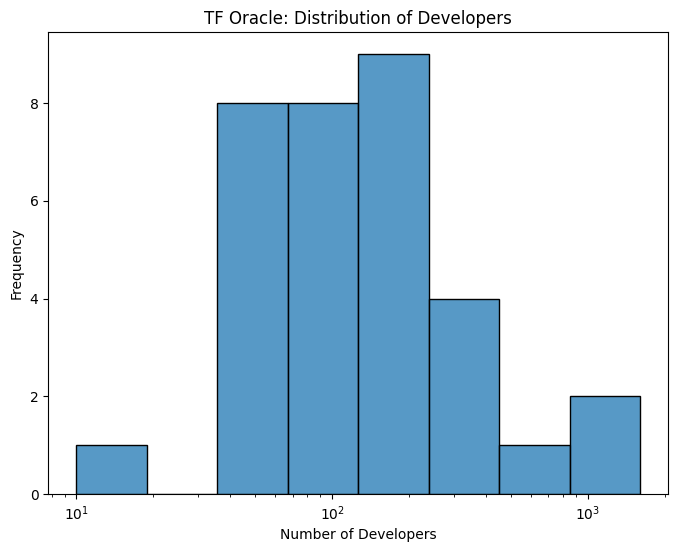

In [10]:
plt.figure(figsize=(8, 6))
codescene_feirra = codescene_feirra[codescene_feirra['authors']>0]
sns.histplot(codescene_feirra['authors'], kde=False, log_scale=(True, False))
plt.title('TF Oracle: Distribution of Developers')
plt.xlabel('Number of Developers')
plt.ylabel('Frequency')
plt.show()

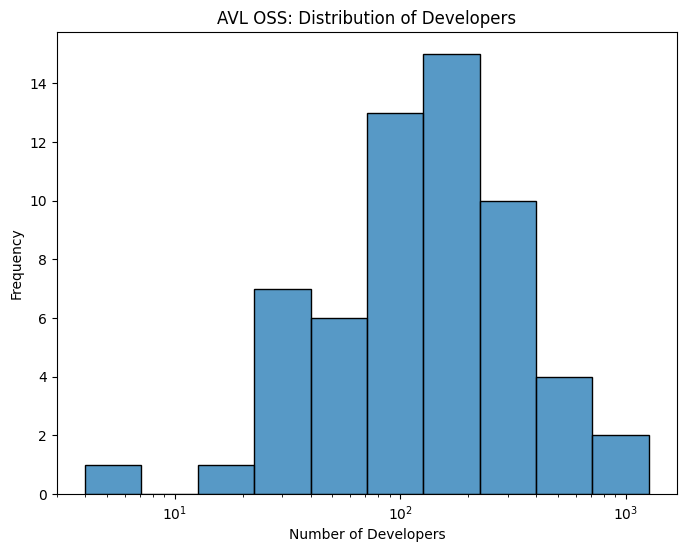

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_avelino['authors'], kde=False, log_scale=(True, False))
plt.title('AVL OSS: Distribution of Developers')
plt.xlabel('Number of Developers')
plt.ylabel('Frequency')
plt.show()

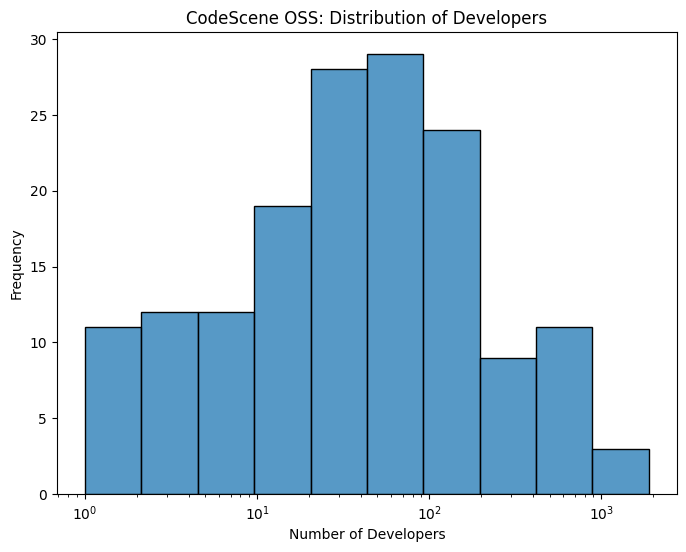

In [81]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_open_files_filtered['authors'], kde=False, log_scale=(True, False))
plt.title('CodeScene OSS: Distribution of Developers')
plt.xlabel('Number of Developers')
plt.ylabel('Frequency')
plt.show()

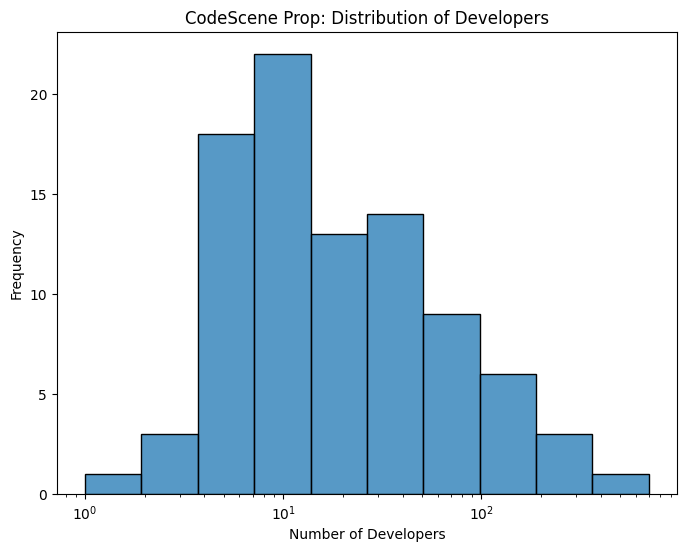

In [82]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_closed_files_filtered['authors'], kde=False, log_scale=True)
plt.title('CodeScene Prop: Distribution of Developers')
plt.xlabel('Number of Developers')
plt.ylabel('Frequency')
plt.show()

## Plot active developers

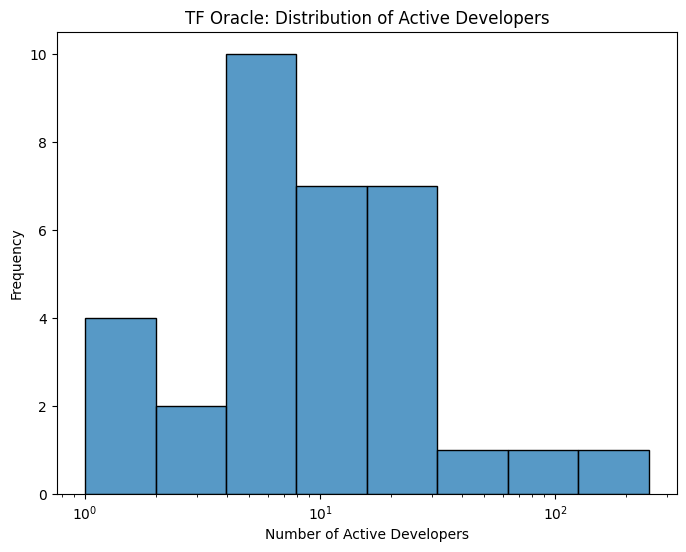

In [14]:
plt.figure(figsize=(8, 6))
codescene_feirra = codescene_feirra[codescene_feirra['authors']>0]
sns.histplot(codescene_feirra['active_authors'], kde=False, log_scale=True)
plt.title('TF Oracle: Distribution of Active Developers')
plt.xlabel('Number of Active Developers')
plt.ylabel('Frequency')
plt.show()

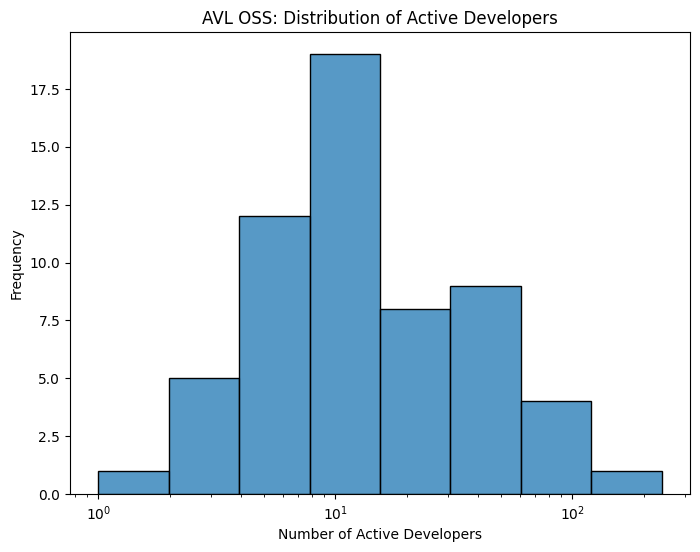

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_avelino['active_authors'], kde=False, log_scale=True)
plt.title('AVL OSS: Distribution of Active Developers')
plt.xlabel('Number of Active Developers')
plt.ylabel('Frequency')
plt.show()

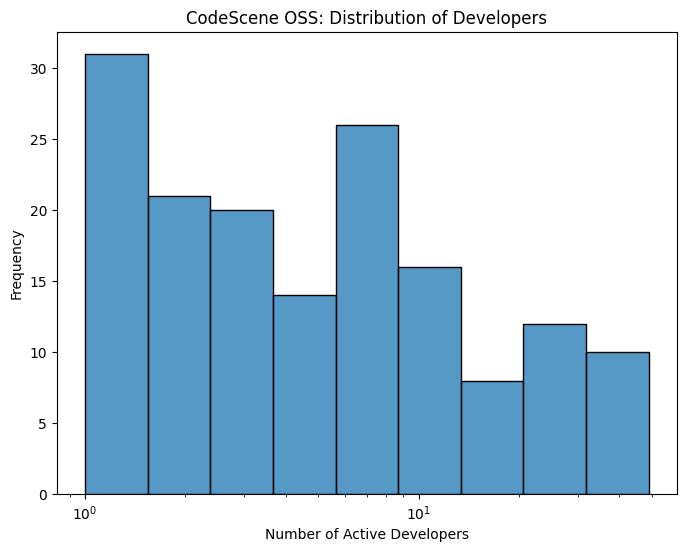

In [84]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_open_files_filtered['active_authors'], kde=False, log_scale=True)
plt.title('CodeScene OSS: Distribution of Developers')
plt.xlabel('Number of Active Developers')
plt.ylabel('Frequency')
plt.show()

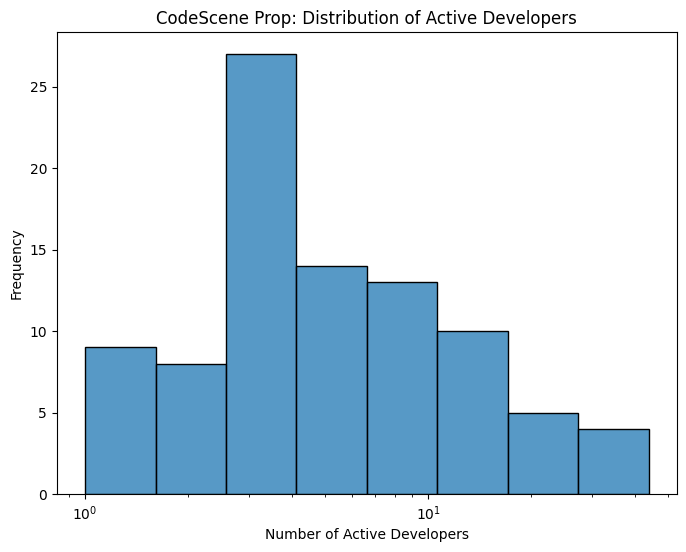

In [85]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_closed_files_filtered['active_authors'], kde=False, log_scale=True)
plt.title('CodeScene Prop: Distribution of Active Developers')
plt.xlabel('Number of Active Developers')
plt.ylabel('Frequency')
plt.show()

## Plot entities

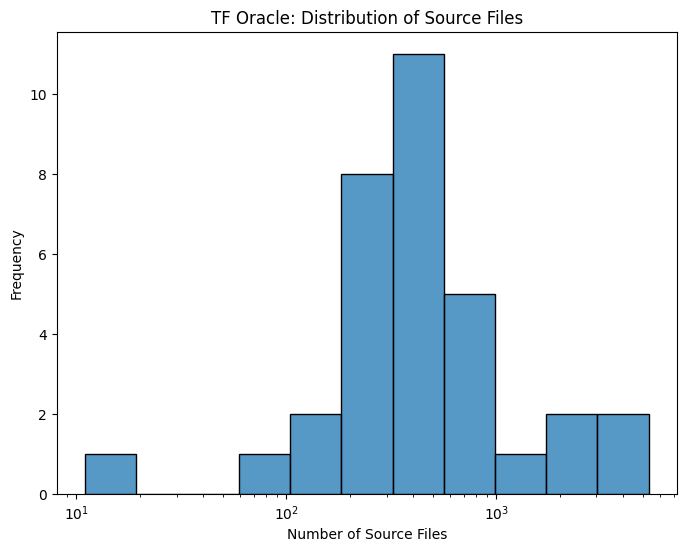

In [93]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_feirra['entities'], kde=False, log_scale=True)
plt.title('TF Oracle: Distribution of Source Files')
plt.xlabel('Number of Source Files')
plt.ylabel('Frequency')
plt.show()

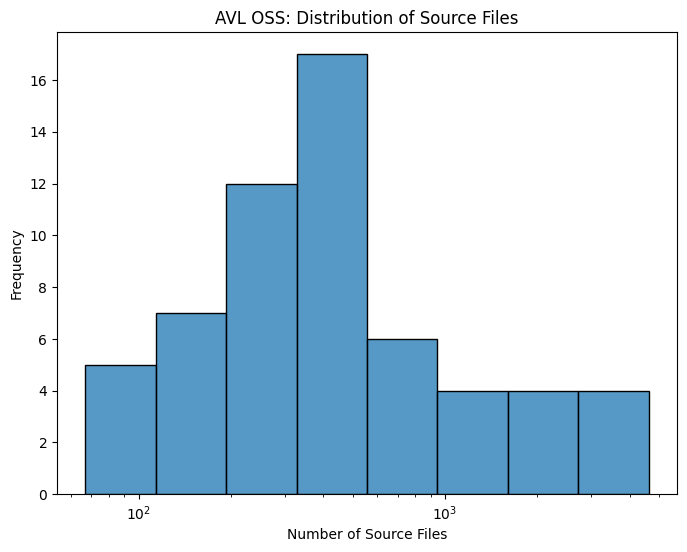

In [94]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_avelino['entities'], kde=False, log_scale=True)
plt.title('AVL OSS: Distribution of Source Files')
plt.xlabel('Number of Source Files')
plt.ylabel('Frequency')
plt.show()

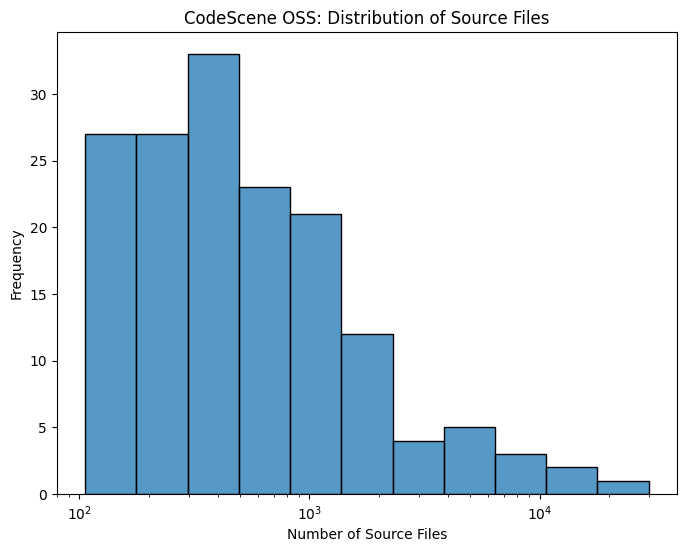

In [95]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_open_files_filtered['entities'], kde=False, log_scale=True)
plt.title('CodeScene OSS: Distribution of Source Files')
plt.xlabel('Number of Source Files')
plt.ylabel('Frequency')
plt.show()

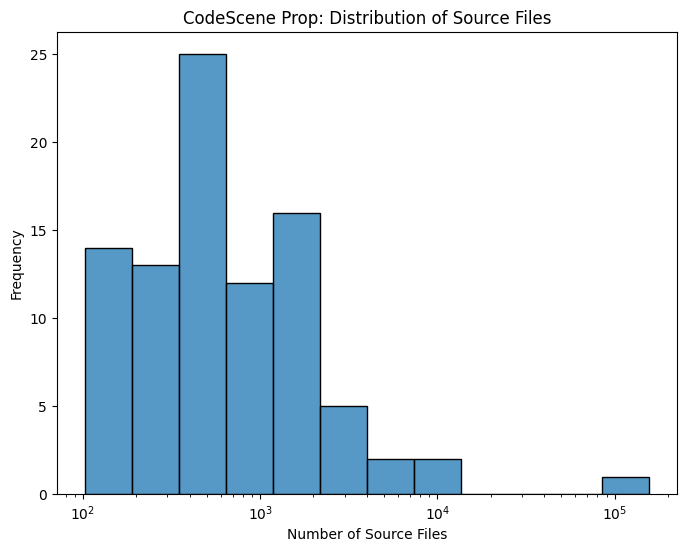

In [96]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_closed_files_filtered['entities'], kde=False, log_scale=True)
plt.title('CodeScene Prop: Distribution of Source Files')
plt.xlabel('Number of Source Files')
plt.ylabel('Frequency')
plt.show()

## Plot commits

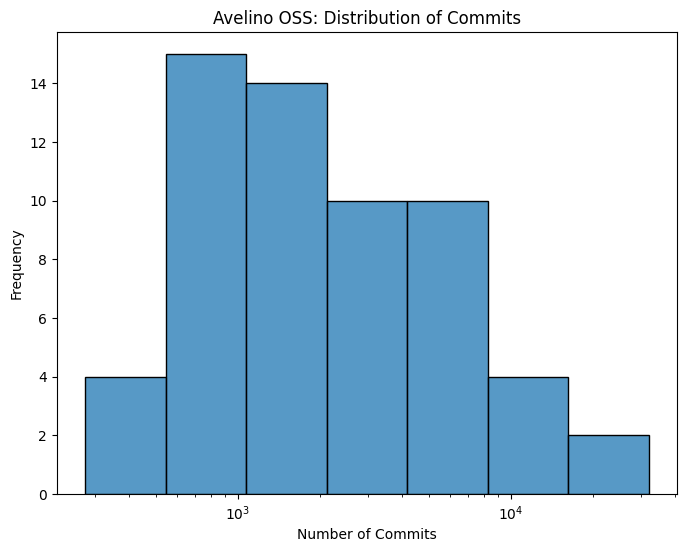

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_avelino['commits'], kde=False, log_scale=True)
plt.title('Avelino OSS: Distribution of Commits')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()

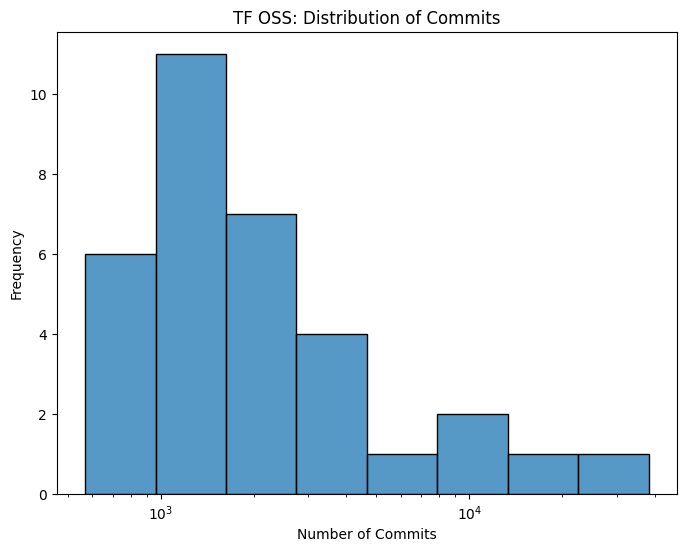

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_feirra['commits'], kde=False, log_scale=True)
plt.title('TF OSS: Distribution of Commits')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()

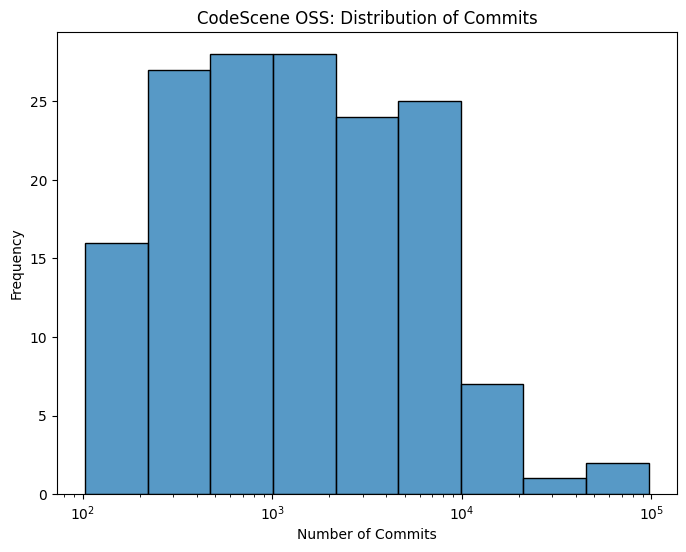

In [88]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_open_files_filtered['commits'], kde=False, log_scale=True)
plt.title('CodeScene OSS: Distribution of Commits')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()

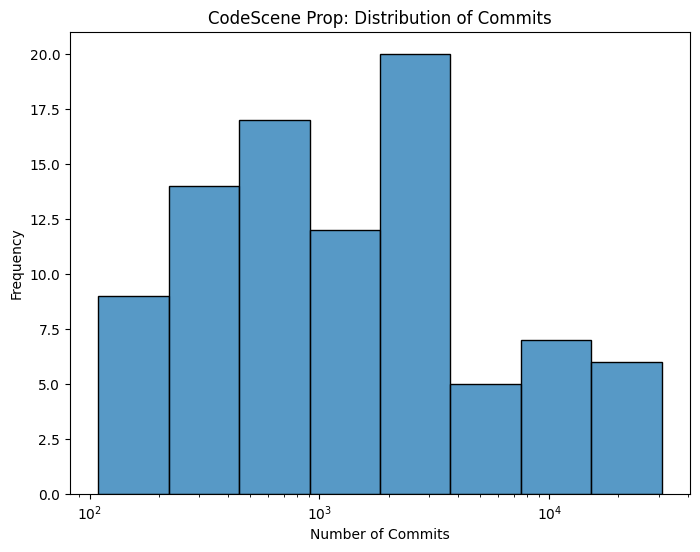

In [89]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_closed_files_filtered['commits'], kde=False, log_scale=True)
plt.title('CodeScene Prop: Distribution of Commits')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()

## Plot language distribution

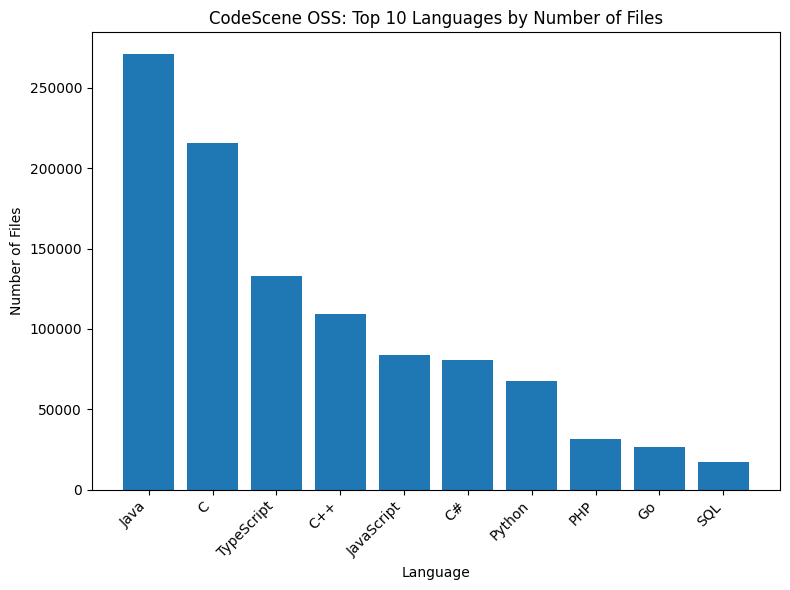

In [26]:
codescene_open_files = pd.read_csv('./data/truck_factor__filesummary__oss.csv', sep=',', decimal=".")
grouped_files = pd.merge(codescene_open_files, codescene_open_filtered, on="project_id", how="inner")

grouped_files = codescene_open_files.groupby('language')['files'].sum().reset_index()
grouped_files = grouped_files[~grouped_files['language'].isin(['Ignored', 'Markdown', 'CSV', 'XML', 'CSS', 'HTML', 'Text', 'YAML', 'JSON', 'Properties'])]
sorted_data = grouped_files.sort_values(by='files', ascending=False)
top_10_languages = sorted_data.head(10)

# Plot the data
# Define a color palette with different colors for each bar
colors = sns.color_palette('husl', n_colors=len(top_10_languages))

plt.figure(figsize=(8, 6))
plt.bar(top_10_languages['language'], top_10_languages['files'])
plt.xlabel('Language')
plt.ylabel('Number of Files')
plt.title('CodeScene OSS: Top 10 Languages by Number of Files')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


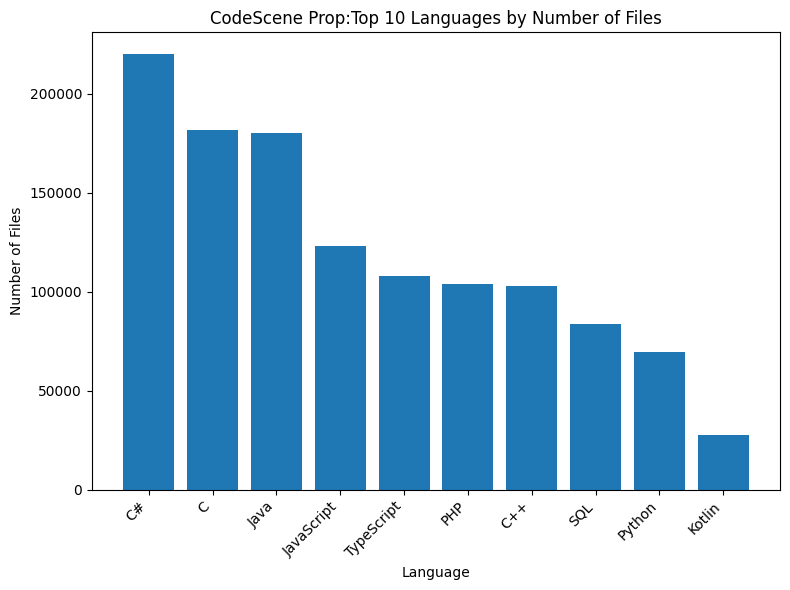

In [27]:
codescene_prop_files = pd.read_csv('./data/truck_factor__filesummary.csv', sep=',', decimal=".")

grouped_files = pd.merge(codescene_prop_files, codescene_closed_filtered, on="project_id", how="inner")
grouped_files = codescene_prop_files.groupby('language')['files'].sum().reset_index()
grouped_files = grouped_files[~grouped_files['language'].isin(['Ignored', 'Markdown', 'CSV', 'XML', 'CSS', 'HTML', 'Text', 'YAML', 'JSON', 'Properties'])]
sorted_data = grouped_files.sort_values(by='files', ascending=False)
top_10_languages = sorted_data.head(10)

# Plot the data
# Define a color palette with different colors for each bar
colors = sns.color_palette('husl', n_colors=len(top_10_languages))

plt.figure(figsize=(8, 6))
plt.bar(top_10_languages['language'], top_10_languages['files'])
plt.xlabel('Language')
plt.ylabel('Number of Files')
plt.title('CodeScene Prop:Top 10 Languages by Number of Files')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


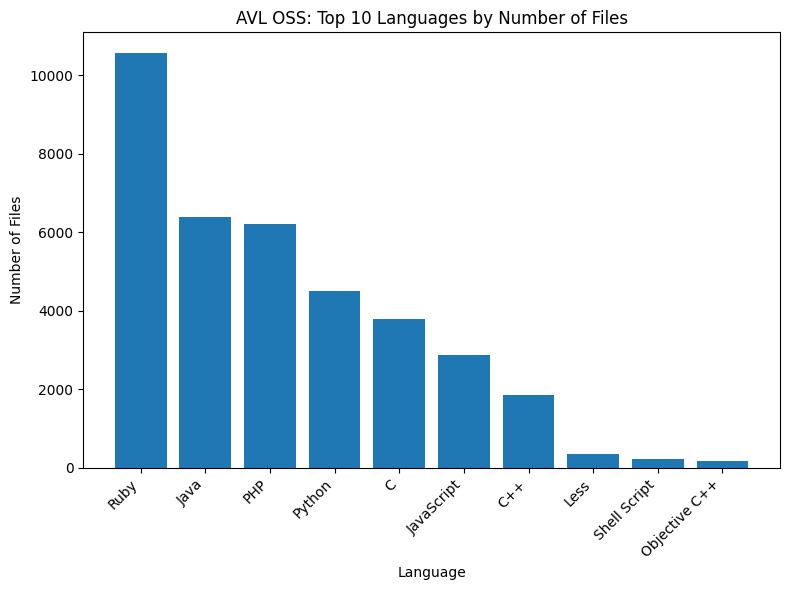

In [28]:
codescene_avelino_files = pd.read_csv('./data/truck_factor__filesummary__avelino.csv', sep=',', decimal=".")
codescene_avelino_files.describe()

grouped_files = codescene_avelino_files.groupby('language')['files'].sum().reset_index()
grouped_files = grouped_files[~grouped_files['language'].isin(['Ignored', 'Markdown', 'CSV', 'XML', 'CSS', 'HTML', 'Text', 'YAML', 'JSON', 'Properties'])]
sorted_data = grouped_files.sort_values(by='files', ascending=False)
top_10_languages = sorted_data.head(10)

# Plot the data
# Define a color palette with different colors for each bar
colors = sns.color_palette('husl', n_colors=len(top_10_languages))

plt.figure(figsize=(8, 6))
plt.bar(top_10_languages['language'], top_10_languages['files'])
plt.xlabel('Language')
plt.ylabel('Number of Files')
plt.title('AVL OSS: Top 10 Languages by Number of Files')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


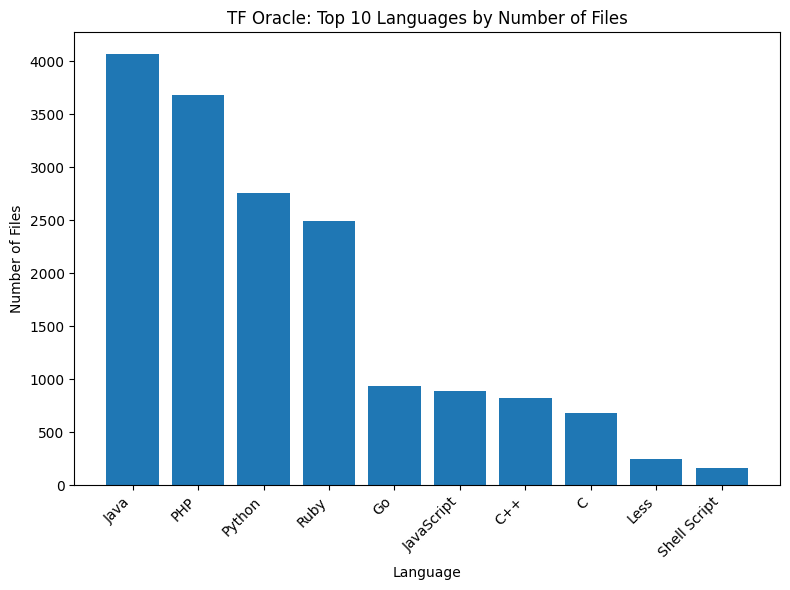

In [29]:
codescene_ferreira_files = pd.read_csv('./data/truck_factor__filesummary__ferreria.csv', sep=',', decimal=".")
codescene_ferreira_files.describe()

grouped_files = codescene_ferreira_files.groupby('language')['files'].sum().reset_index()
grouped_files = grouped_files[~grouped_files['language'].isin(['Ignored', 'Markdown', 'CSV', 'XML', 'CSS', 'HTML', 'Text', 'YAML', 'JSON', 'Properties'])]
sorted_data = grouped_files.sort_values(by='files', ascending=False)
top_10_languages = sorted_data.head(10)

# Plot the data
# Define a color palette with different colors for each bar
colors = sns.color_palette('husl', n_colors=len(top_10_languages))

plt.figure(figsize=(8, 6))
plt.bar(top_10_languages['language'], top_10_languages['files'])
plt.xlabel('Language')
plt.ylabel('Number of Files')
plt.title('TF Oracle: Top 10 Languages by Number of Files')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
